In [1]:
# Import required libraries
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from __future__ import print_function
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Loading data
Demographic = pd.read_csv("data/Demographic.csv")
Bill_Last6Months = pd.read_csv("data/Bill_Last6Months.csv")

#Loading preprocessed data

"""
1-The rows with a lot of "NAN"s are removed
2-The minor "NAN"s in the rows are converted to "unknown"
3-The spelling mistakes are corrected
4-Different forms of writing are unfied, like: Admin, admin, Adminstration
"""

Clean_Demographic = pd.read_csv("data/Clean_Demographic.csv")

#The rows contatining "unknown" are removed
WClean_Demographic = pd.read_csv("data/WClean_Demographic.csv") 

In [3]:
#Showing Demographic as a dataframe 
Demographic

,ID,ACCOUNT_TYPE,LIMIT_BAL,GENDER,AGE,MARITAL_STATUS,EDUCATION,JOB_TYPE,HOUSING,LOAN,default payment in Jan 2022
0,X000001,Current account,20035.0,Male,23.0,Married,Secondary school,House help,no,no,0.0
1,X000002,Current account,120112.0,Female,25.0,Married,Secondary school,Business owner,no,no,1.0
2,X000003,Salary account,89683.0,Female,36.0,Married,Vocational degree,Technician,yes,no,0.0
3,X000004,Salary account,50995.0,Female,36.0,Married,Vocational degree,Technician,no,unknown,0.0
4,X000005,Current account,50779.0,Male,59.0,Married,Secondary school,Part-time,no,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29996,X029997,Current account,149320.0,Male,44.0,Married,High school,Part-time,no,no,0.0
29997,X029998,Salary account,29981.0,Male,38.0,Divorced,High school,Services,no,unknown,0.0
29998,X029999,Current account,80865.0,Male,42.0,Divorced,Secondary school,House help,yes,no,0.0
29999,X030000,Current account,49330.0,Male,44.0,Divorced,Middle school,Business owner,yes,no,1.0


In [4]:
#Showing the cleaned Demographic as a dataframe 
Clean_Demographic

,ID,ACCOUNT_TYPE,LIMIT_BAL,GENDER,AGE,MARITAL_STATUS,EDUCATION,JOB_TYPE,HOUSING,LOAN,default payment in Jan 2022
0,X000001,Current account,20035,Male,23,Married,Secondary school,House help,no,no,0
1,X000002,Current account,120112,Female,25,Married,Secondary school,Business owner,no,no,1
2,X000003,Salary account,89683,Female,36,Married,Vocational degree,Technician,yes,no,0
3,X000004,Salary account,50995,Female,36,Married,Vocational degree,Technician,no,unknown,0
4,X000005,Current account,50779,Male,59,Married,Secondary school,Part-time,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...
29858,X029996,Current account,219246,Male,40,Single,Secondary school,Administration,yes,no,0
29859,X029997,Current account,149320,Male,44,Married,High school,Part-time,no,no,0
29860,X029998,Salary account,29981,Male,38,Divorced,High school,Services,no,unknown,0
29861,X029999,Current account,80865,Male,42,Divorced,Secondary school,House help,yes,no,0


In [5]:
#Showing the cleaned Demographic without "unknwon" values as a dataframe 
WClean_Demographic

,ID,ACCOUNT_TYPE,LIMIT_BAL,GENDER,AGE,MARITAL_STATUS,EDUCATION,JOB_TYPE,HOUSING,LOAN,default payment in Jan 2022
0,X000001,Current account,20035,Male,23,Married,Secondary school,House help,no,no,0
1,X000002,Current account,120112,Female,25,Married,Secondary school,Business owner,no,no,1
2,X000003,Salary account,89683,Female,36,Married,Vocational degree,Technician,yes,no,0
3,X000005,Current account,50779,Male,59,Married,Secondary school,Part-time,no,no,0
4,X000006,Current account,50289,Male,39,Married,Middle school,Administration,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...
26874,X029994,Salary account,100859,Male,36,Married,Vocational degree,Services,no,no,0
26875,X029996,Current account,219246,Male,40,Single,Secondary school,Administration,yes,no,0
26876,X029997,Current account,149320,Male,44,Married,High school,Part-time,no,no,0
26877,X029999,Current account,80865,Male,42,Divorced,Secondary school,House help,yes,no,0


In [6]:
#Data Post-processing
Clean_Demographic["HOUSING"]  = Clean_Demographic["HOUSING"].replace({'NAN': 'unknown' })
Clean_Demographic["EDUCATION"]  = Clean_Demographic["EDUCATION"].replace({'Secondary school': 'School', 
    'Primary school': 'School', 'High school': 'School', 'Middle school': 'School','NAN': 'unknown' })
Clean_Demographic["JOB_TYPE"]  = Clean_Demographic["JOB_TYPE"].replace({'unemployed': 'Unemployed', 'NAN':'unknown'})

WClean_Demographic["HOUSING"]  = WClean_Demographic["HOUSING"].replace({'NAN': 'unknown' })
WClean_Demographic["EDUCATION"]  = WClean_Demographic["EDUCATION"].replace({'Secondary school': 'School', 
    'Primary school': 'School', 'High school': 'School', 'Middle school': 'School','NAN': 'unknown' })
WClean_Demographic["JOB_TYPE"]  = WClean_Demographic["JOB_TYPE"].replace({'unemployed': 'Unemployed', 'NAN':'unknown'})

<Figure size 432x288 with 0 Axes>

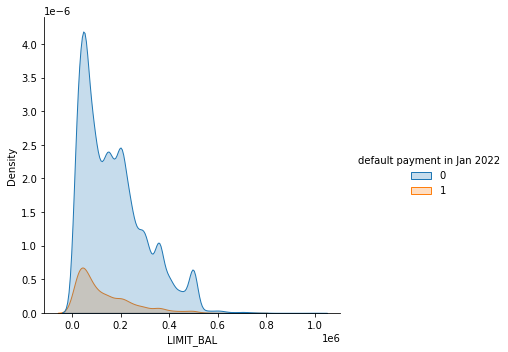

In [7]:
#Data statistics
#Density of two classes in terms of LIMIT_BAL
fig=plt.figure()
sns.displot(data=Clean_Demographic, x="LIMIT_BAL", hue="default payment in Jan 2022", kind="kde",fill=True)
plt.savefig('figures/LIMIT_BAL density of two classes.png')
plt.show()

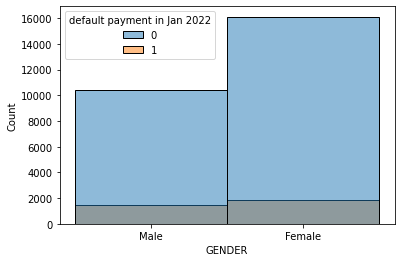

In [8]:
# Histogram of the two classes in terms of GENDER
fig=plt.figure()
sns.histplot(data=Clean_Demographic, x="GENDER", hue="default payment in Jan 2022")
plt.savefig('figures/Histogram of the two classes in terms of GENDER.png')
plt.show()

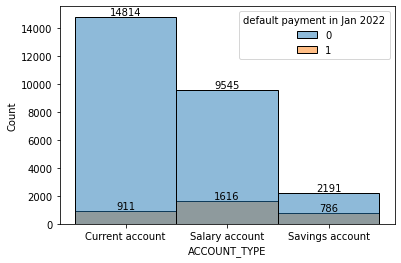

In [9]:
# Histogram of the two classes in terms of ACCOUNT_TYPE
fig=plt.figure()
ax = sns.histplot(data=Clean_Demographic, x="ACCOUNT_TYPE", hue="default payment in Jan 2022", binwidth=2)
for i in ax.containers:
    ax.bar_label(i,) 
plt.savefig('figures/Histogram of the two classes in terms of ACCOUNT_TYPE.png')
plt.show()

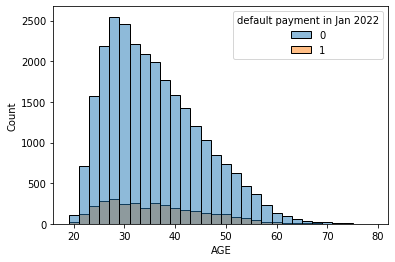

In [10]:
# Histogram of the two classes in terms of AGE
fig=plt.figure()
sns.histplot(data=Clean_Demographic, x="AGE", hue="default payment in Jan 2022", binwidth=2)
plt.savefig('figures/Histogram of the two classes in terms of AGE.png')
plt.show()

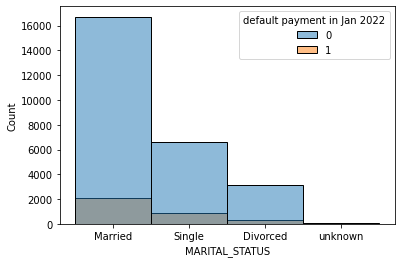

In [11]:
# Histogram of the two classes in terms of MARITAL_STATUS
fig=plt.figure()
sns.histplot(data=Clean_Demographic, x="MARITAL_STATUS", hue="default payment in Jan 2022", binwidth=2)
plt.savefig('figures/Histogram of the two classes in terms of MARITAL_STATUS.png')
plt.show()

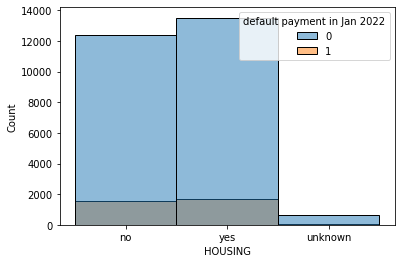

In [12]:
# Histogram of the two classes in terms of HOUSING
fig=plt.figure()
sns.histplot(data=Clean_Demographic, x="HOUSING", hue="default payment in Jan 2022", binwidth=2)
plt.savefig('figures/Histogram of the two classes in terms of HOUSING.png')
plt.show()

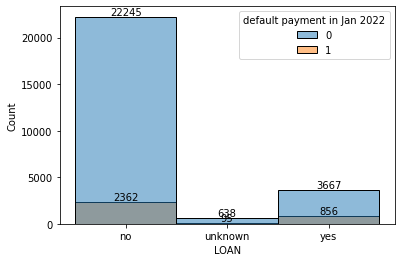

In [13]:
# Histogram of the two classes in terms of LOAN
fig=plt.figure()
ax = sns.histplot(data=Clean_Demographic, x="LOAN", hue="default payment in Jan 2022", binwidth=2)
for i in ax.containers:
    ax.bar_label(i,)   
plt.savefig('figures/Histogram of the two classes in terms of LOAN.png')

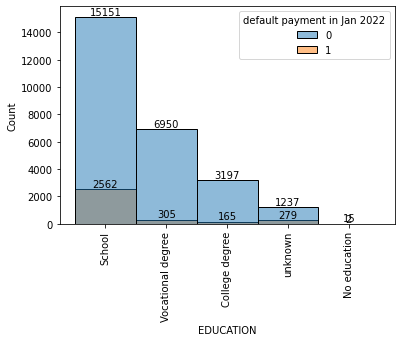

In [14]:
# Histogram of the two classes in terms of EDUCATION
fig=plt.figure()
ax = sns.histplot(data=Clean_Demographic, x="EDUCATION", hue="default payment in Jan 2022")
ax.tick_params(axis='x', rotation=90)
for i in ax.containers:
    ax.bar_label(i,)    
plt.savefig('figures/Histogram of the two classes in terms of EDUCATION.png')

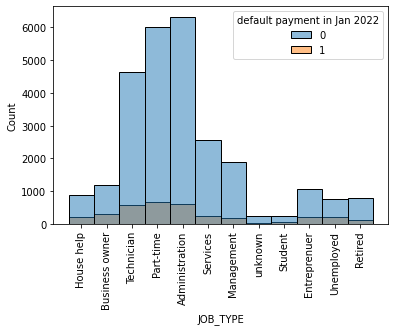

In [15]:
# Histogram of the two classes in terms of JOB_TYPE
fig=plt.figure()
ax = sns.histplot(data=Clean_Demographic, x="JOB_TYPE", hue="default payment in Jan 2022")
ax.tick_params(axis='x', rotation=90)
plt.savefig('figures/Histogram of the two classes in terms of JOB_TYPE.png')

<Figure size 432x288 with 0 Axes>

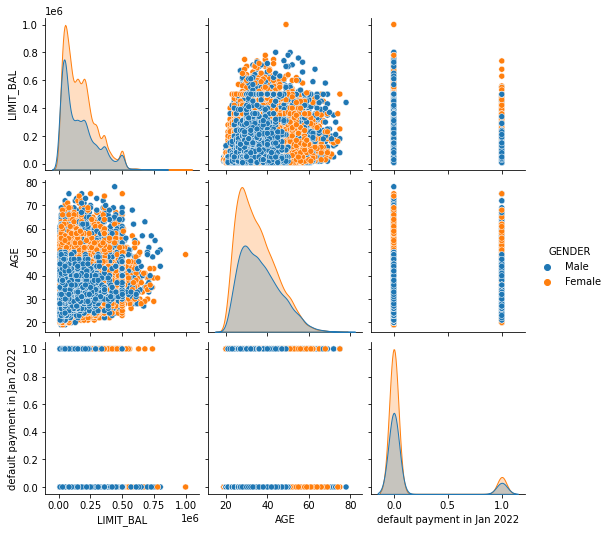

In [16]:
# Plotting of "GENDER" features paired with "LIMIT_BAL" and "AGE"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='GENDER')
plt.savefig('figures/Plotting of GENDER features paired with LIMIT_BAL and AGE.png')
plt.show()

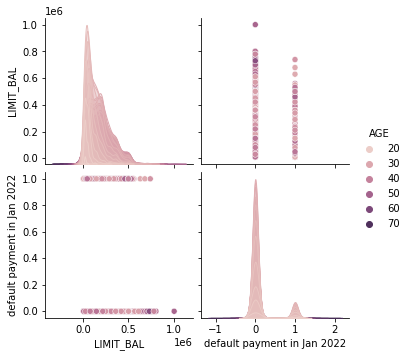

In [17]:
# Plotting of "AGE" features paired with "LIMIT_BAL"
sns.pairplot(Clean_Demographic, hue='AGE')
plt.savefig('figures/Plotting of AGE features paired with LIMIT_BAL.png')
plt.show()

<Figure size 432x288 with 0 Axes>

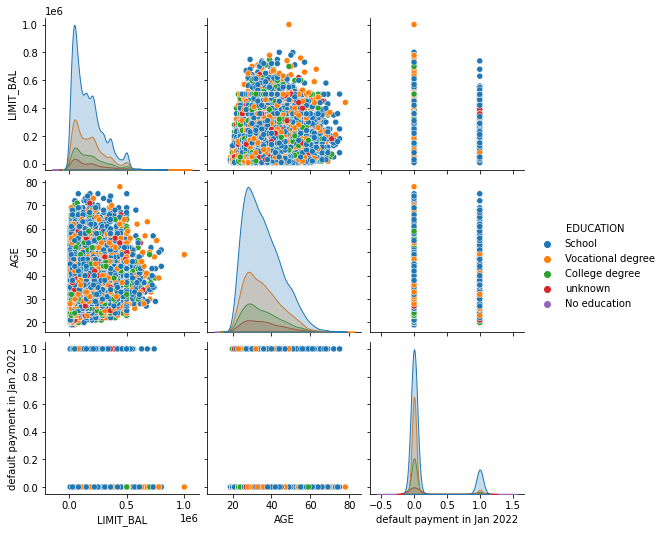

In [18]:
# Plotting of "EDUCATION" features paired with "LIMIT_BAL" and "AGE"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='EDUCATION')
plt.savefig('figures/Plotting of EDUCATION features paired with LIMIT_BAL and AGE.png')
plt.show()

<Figure size 432x288 with 0 Axes>

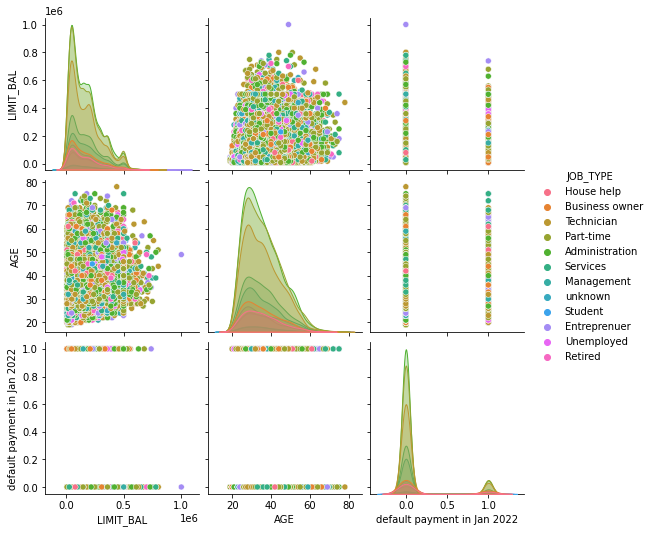

In [19]:
# Plotting of "JOB_TYPE" features paired with "LIMIT_BAL" and "AGE"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='JOB_TYPE')
plt.savefig('figures/Plotting of JOB_TYPE features paired with LIMIT_BAL and AGE.png')
plt.show()

<Figure size 432x288 with 0 Axes>

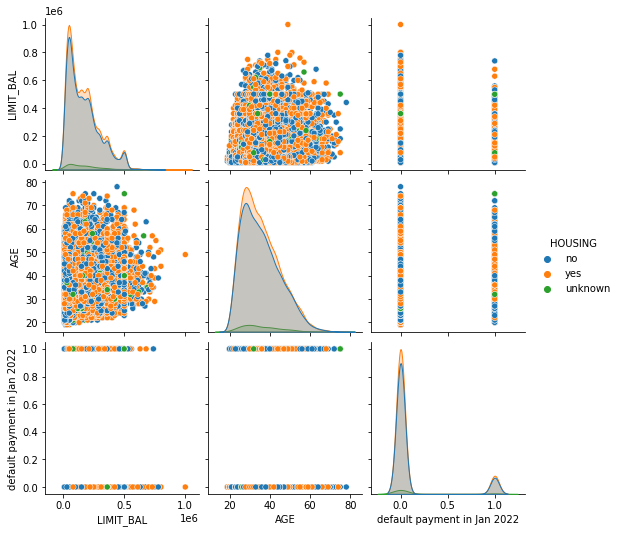

In [20]:
# Plotting "HOUSING" features paired with "AGE" and "LIMIT_BAL"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='HOUSING')
plt.savefig('figures/Plotting HOUSING features paired with AGE and LIMIT_BAL.png')
plt.show()

<Figure size 432x288 with 0 Axes>

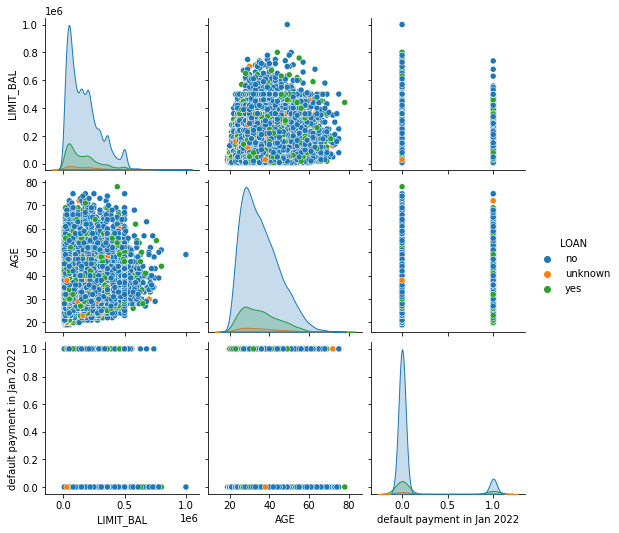

In [21]:
# Plotting "LOAN" features paired with "LIMIT_BAL" and "AGE"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='LOAN')
plt.savefig('figures/Plotting LOAN features paired with LIMIT_BAL and AGE.png')
plt.show()

<Figure size 432x288 with 0 Axes>

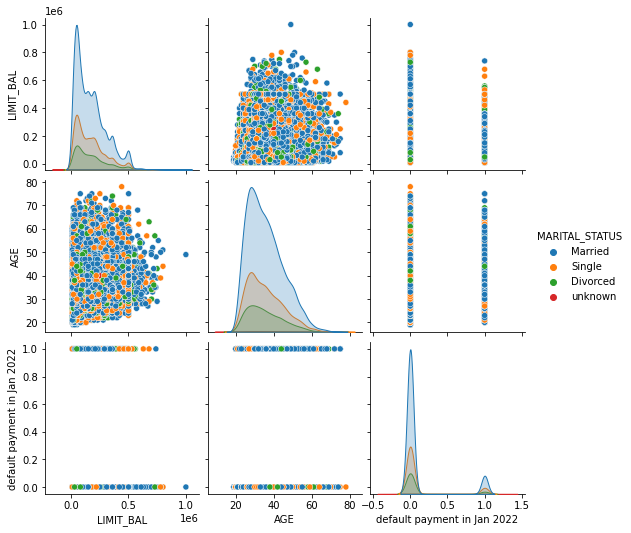

In [22]:
# Plotting "MARITAL_STATUS" features paired with "LIMIT_BAL" and "AGE"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='MARITAL_STATUS')
plt.savefig('figures/Plotting MARITAL_STATUS features paired with LIMIT_BAL and AGE.png')
plt.show()

<Figure size 432x288 with 0 Axes>

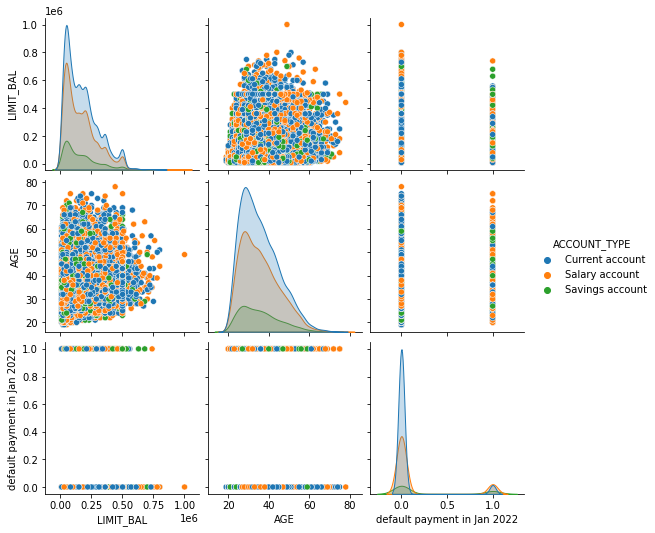

In [23]:
# Plotting "ACCOUNT_TYPE" features "LIMIT_BAL" and "AGE"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='ACCOUNT_TYPE')
plt.savefig('figures/Plotting ACCOUNT_TYPE features LIMIT_BAL and AGE.png')
plt.show()

<Figure size 432x288 with 0 Axes>

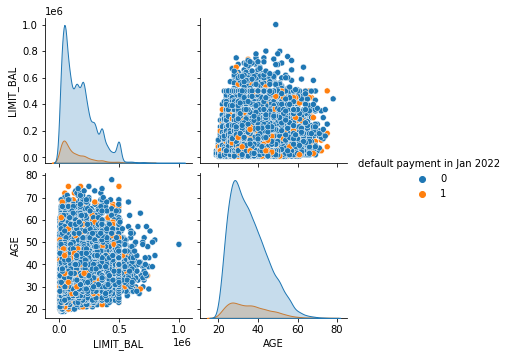

In [24]:
# Plotting "default payment in Jan 2022" features paired with "LIMIT_BAL" and "AGE"
fig=plt.figure()
sns.pairplot(Clean_Demographic, hue='default payment in Jan 2022')
plt.savefig('figures/ Plotting default payment in Jan 2022 features paired with LIMIT_BAL and AGE.png')
plt.show()

In [25]:
# Make the data vlaues numerical
columns = ['ACCOUNT_TYPE','GENDER', 'MARITAL_STATUS', 'EDUCATION', 'JOB_TYPE', 'HOUSING', 'LOAN']

Clean_Demographic_num = Clean_Demographic 
Clean_Demographic_num[columns] = Clean_Demographic_num[columns].apply(lambda col: pd.factorize(col, sort=False)[0])

WClean_Demographic_num = WClean_Demographic 
WClean_Demographic_num[columns] = WClean_Demographic_num[columns].apply(lambda col: pd.factorize(col, sort=False)[0])

In [26]:
# Showing the numbered values
Clean_Demographic_num

,ID,ACCOUNT_TYPE,LIMIT_BAL,GENDER,AGE,MARITAL_STATUS,EDUCATION,JOB_TYPE,HOUSING,LOAN,default payment in Jan 2022
0,X000001,0,20035,0,23,0,0,0,0,0,0
1,X000002,0,120112,1,25,0,0,1,0,0,1
2,X000003,1,89683,1,36,0,1,2,1,0,0
3,X000004,1,50995,1,36,0,1,2,0,1,0
4,X000005,0,50779,0,59,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29858,X029996,0,219246,0,40,1,0,4,1,0,0
29859,X029997,0,149320,0,44,0,0,3,0,0,0
29860,X029998,1,29981,0,38,2,0,5,0,1,0
29861,X029999,0,80865,0,42,2,0,0,1,0,0


In [27]:
# Normalizing each column (feature values) of data
min_max_scaler = preprocessing.MinMaxScaler()
for i in range(1,10): # "ACCOUNT_TYPE" to "LOAN" columns
    Clean_Demographic_num.iloc[:,i] = pd.DataFrame(min_max_scaler.fit_transform(Clean_Demographic_num.iloc[:,i].values.reshape(-1, 1)))
    WClean_Demographic_num.iloc[:,i] = pd.DataFrame(min_max_scaler.fit_transform(WClean_Demographic_num.iloc[:,i].values.reshape(-1, 1)))

In [28]:
##Showing the normalized values
Clean_Demographic_num

,ID,ACCOUNT_TYPE,LIMIT_BAL,GENDER,AGE,MARITAL_STATUS,EDUCATION,JOB_TYPE,HOUSING,LOAN,default payment in Jan 2022
0,X000001,0.0,0.011127,0.0,0.067797,0.000000,0.00,0.000000,0.0,0.0,0
1,X000002,0.0,0.112061,1.0,0.101695,0.000000,0.00,0.090909,0.0,0.0,1
2,X000003,0.5,0.081371,1.0,0.288136,0.000000,0.25,0.181818,0.5,0.0,0
3,X000004,0.5,0.042352,1.0,0.288136,0.000000,0.25,0.181818,0.0,0.5,0
4,X000005,0.0,0.042134,0.0,0.677966,0.000000,0.00,0.272727,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
29858,X029996,0.0,0.212045,0.0,0.355932,0.333333,0.00,0.363636,0.5,0.0,0
29859,X029997,0.0,0.141519,0.0,0.423729,0.000000,0.00,0.272727,0.0,0.0,0
29860,X029998,0.5,0.021158,0.0,0.322034,0.666667,0.00,0.454545,0.0,0.5,0
29861,X029999,0.0,0.072478,0.0,0.389831,0.666667,0.00,0.000000,0.5,0.0,0


In [29]:
# Showing the Normalized values
WClean_Demographic_num

,ID,ACCOUNT_TYPE,LIMIT_BAL,GENDER,AGE,MARITAL_STATUS,EDUCATION,JOB_TYPE,HOUSING,LOAN,default payment in Jan 2022
0,X000001,0.0,0.011127,0.0,0.067797,0.0,0.000000,0.0,0.0,0.0,0
1,X000002,0.0,0.112061,1.0,0.101695,0.0,0.000000,0.1,0.0,0.0,1
2,X000003,0.5,0.081371,1.0,0.288136,0.0,0.333333,0.2,1.0,0.0,0
3,X000005,0.0,0.042134,0.0,0.677966,0.0,0.000000,0.3,0.0,0.0,0
4,X000006,0.0,0.041640,0.0,0.338983,0.0,0.000000,0.4,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
26874,X029994,0.5,0.092643,0.0,0.288136,0.0,0.333333,0.5,0.0,0.0,0
26875,X029996,0.0,0.212045,0.0,0.355932,0.5,0.000000,0.4,1.0,0.0,0
26876,X029997,0.0,0.141519,0.0,0.423729,0.0,0.000000,0.3,0.0,0.0,0
26877,X029999,0.0,0.072478,0.0,0.389831,1.0,0.000000,0.0,1.0,0.0,0


/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


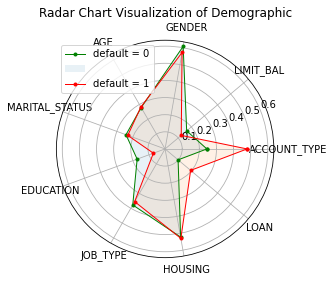

In [30]:
#Radar (Spider) chart
%matplotlib inline
labels=['ACCOUNT_TYPE', 'LIMIT_BAL', 'GENDER', 'AGE', 'MARITAL_STATUS', 'EDUCATION', 'JOB_TYPE', 'HOUSING', 'LOAN']
mean_d0 = np.mean(WClean_Demographic_num[WClean_Demographic_num['default payment in Jan 2022'] ==0][labels])
mean_d1 = np.mean(WClean_Demographic_num[WClean_Demographic_num['default payment in Jan 2022'] ==1][labels])
stats0 = mean_d0.values
stats1 = mean_d1.values

angles0=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle
# close the plot
stats0_=np.concatenate((stats0,[stats0[0]])) 
angles0_=np.concatenate((angles0,[angles0[0]]))

angles1=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle
# close the plot
stats1_=np.concatenate((stats1,[stats1[0]]))  # Closed
angles1_=np.concatenate((angles1,[angles1[0]]))  # Closed


fig=plt.figure()
ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles0_, stats0_, '.-', linewidth=1, color='green')  # Draw the plot (or the frame on the radar chart)
ax.fill(angles0_, stats0_, alpha=0.1)  #Fulfill the area


for i in range(len(angles0)):
    angles0[i] = angles0[i]*180 / np.pi
    
ax.set_thetagrids(angles0, labels)  # Set the label for each axis

ax.plot(angles1_, stats1_, '.-', linewidth=1, color='red')  # Draw the plot (or the frame on the radar chart)
ax.fill(angles1_, stats1_, alpha=0.1)  #Fulfill the area

for i in range(len(angles1)):
    angles1[i] = angles1[i]*180 / np.pi
    
ax.set_thetagrids(angles1, labels)  # Set the label for each axis
ax.legend(['default = 0', None ,'default = 1'])
plt.title("Radar Chart Visualization of Demographic")
plt.show()
fig.savefig('figures/Radar_Chart_Demographic.png')

In [31]:
# t-SNE Visualization
CD0 = Clean_Demographic_num[Clean_Demographic_num['default payment in Jan 2022'] == 0] .iloc[:, 1:10 ].values
CD1 = Clean_Demographic_num[Clean_Demographic_num['default payment in Jan 2022'] == 1] .iloc[:, 1:10 ].values

X = np.vstack((CD0, CD1))
tsne= TSNE(n_components=3, verbose=1, random_state=123)
X_embedded = tsne.fit_transform(X)

len_CD0 = np.shape(CD0)[0]
CD0_embedded = X_embedded[0:len_CD0,:]
CD1_embedded = X_embedded[len_CD0:,:]

/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/stipendiater/mohamadi/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 29863 samples in 0.036s...
[t-SNE] Computed neighbors for 29863 samples in 1.910s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29863
[t-SNE] Computed conditional probabilities for sample 2000 / 29863
[t-SNE] Computed conditional probabilities for sample 3000 / 29863
[t-SNE] Computed conditional probabilities for sample 4000 / 29863
[t-SNE] Computed conditional probabilities for sample 5000 / 29863
[t-SNE] Computed conditional probabilities for sample 6000 / 29863
[t-SNE] Computed conditional probabilities for sample 7000 / 29863
[t-SNE] Computed conditional probabilities for sample 8000 / 29863
[t-SNE] Computed conditional probabilities for sample 9000 / 29863
[t-SNE] Computed conditional probabilities for sample 10000 / 29863
[t-SNE] Computed conditional probabilities for sample 11000 / 29863
[t-SNE] Computed conditional probabilities for sample 12000 / 29863
[t-SNE] Computed conditional probabilities for sam

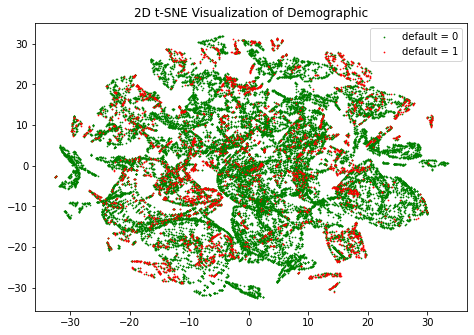

In [32]:
#2D t-SNE Visualization
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("on")
plt.scatter(CD0_embedded[:,0],CD0_embedded[:,1], marker='.', s = 2, color='green')
plt.scatter(CD1_embedded[:,0],CD1_embedded[:,1], marker='.', s = 2, color='red')
ax.legend(['default = 0', 'default = 1'])
plt.title('2D t-SNE Visualization of Demographic')
plt.show()
fig.savefig('figures/2D_tsne_Demographic.png', bbox_inches='tight')

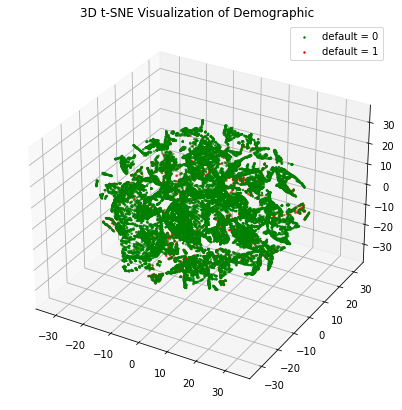

In [33]:
#3D t-SNE Visualization
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(CD0_embedded[:,0], CD0_embedded[:,1], CD0_embedded[:,2],s = 2, color = "green")
ax.scatter3D(CD1_embedded[:,0], CD1_embedded[:,1], CD1_embedded[:,2],s = 2, color = "red")
ax.legend(['default = 0', 'default = 1'])
plt.title("3D t-SNE Visualization of Demographic")
plt.show()
fig.savefig('figures/3D_tsne_Demographic.png')

In [34]:
# PCA Visualization

In [35]:
pca = PCA(n_components=3)
X_embedded_p = pca.fit_transform(X)

CD0_embedded_p = X_embedded_p[0:len_CD0,:]
CD1_embedded_p = X_embedded_p[len_CD0:,:]

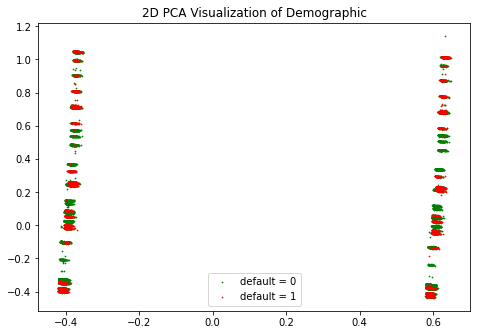

In [36]:
#2D PCA Visualization
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
#ax.axis("off")
plt.scatter(CD0_embedded_p[:,0],CD0_embedded_p[:,1], marker='.', s = 2, color='green')
plt.scatter(CD1_embedded_p[:,0],CD1_embedded_p[:,1], marker='.', s = 2, color='red')
ax.legend(['default = 0', 'default = 1'])
plt.title('2D PCA Visualization of Demographic')
plt.show()
fig.savefig('figures/2D_PCA_Demographic.png',  bbox_inches='tight')

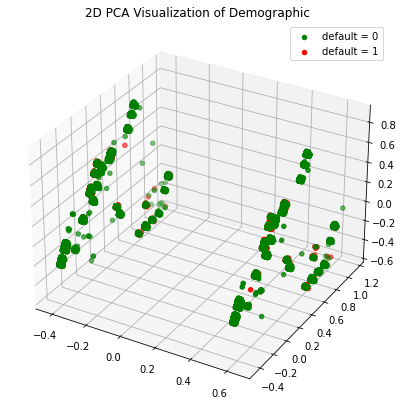

In [37]:
#3D PCA Visualization
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(CD0_embedded_p[:,0], CD0_embedded_p[:,1], CD0_embedded_p[:,2], color = "green")
ax.scatter3D(CD1_embedded_p[:,0], CD1_embedded_p[:,1], CD1_embedded_p[:,2], color = "red")
ax.legend(['default = 0', 'default = 1'])
plt.title('2D PCA Visualization of Demographic')
plt.show()
fig.savefig('figures/3D_PCA_Demographic.png')

In [38]:
# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(Clean_Demographic_num.iloc[:, 1:10] )
true_labels = Clean_Demographic_num['default payment in Jan 2022'].values
y_pred = kmeans.labels_

print('MLP Results:\n\n',classification_report(true_labels, y_pred))

MLP Results:

               precision    recall  f1-score   support

           0       0.88      0.39      0.54     26550
           1       0.10      0.57      0.18      3313

    accuracy                           0.41     29863
   macro avg       0.49      0.48      0.36     29863
weighted avg       0.79      0.41      0.50     29863

